170498071/170498071 [==============================] - 6s 0us/step
Epoch 1/50
782/782 [==============================] - 45s 42ms/step - loss: 2.3026 - accuracy: 0.1007 - val_loss: 2.3024 - val_accuracy: 0.1000
Epoch 2/50
782/782 [==============================] - 33s 43ms/step - loss: 2.3025 - accuracy: 0.1021 - val_loss: 2.3022 - val_accuracy: 0.1325
Epoch 3/50
782/782 [==============================] - 32s 42ms/step - loss: 2.3022 - accuracy: 0.1111 - val_loss: 2.3018 - val_accuracy: 0.1483
Epoch 4/50
782/782 [==============================] - 34s 43ms/step - loss: 2.3013 - accuracy: 0.1218 - val_loss: 2.3000 - val_accuracy: 0.1561
Epoch 5/50
782/782 [==============================] - 33s 43ms/step - loss: 2.2971 - accuracy: 0.1536 - val_loss: 2.2899 - val_accuracy: 0.1675
Epoch 6/50
782/782 [==============================] - 34s 43ms/step - loss: 2.2480 - accuracy: 0.1721 - val_loss: 2.1929 - val_accuracy: 0.1668
Epoch 7/50
782/782 [==============================] - 37s 47ms/step -

<function matplotlib.pyplot.legend(*args, **kwargs)>

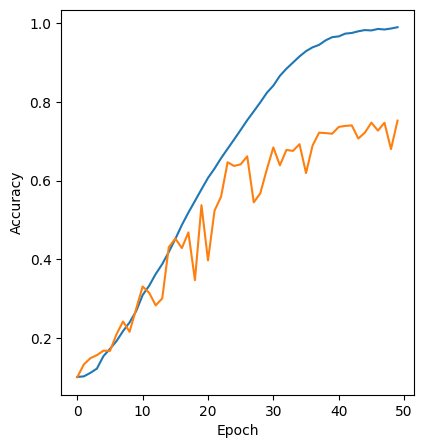

In [1]:
# VGG16 Model trained on the Cifar-10 Dataset


import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the VGG16 architecture
model = Sequential([
    # Block 1
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),
    
    # Block 2
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),
    
    # Block 3
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),
    
    # Block 4
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),
    
    # Block 5
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),
    
    # Fully connected layers
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and save the history
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Plot the training and validation accuracy and loss
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend

Epoch 1/50
782/782 [==============================] - 37s 44ms/step - loss: 2.3026 - accuracy: 0.0993 - val_loss: 2.3024 - val_accuracy: 0.1000
Epoch 2/50
782/782 [==============================] - 34s 43ms/step - loss: 2.3024 - accuracy: 0.1047 - val_loss: 2.3022 - val_accuracy: 0.1000
Epoch 3/50
782/782 [==============================] - 34s 43ms/step - loss: 2.3021 - accuracy: 0.1106 - val_loss: 2.3014 - val_accuracy: 0.1060
Epoch 4/50
782/782 [==============================] - 34s 44ms/step - loss: 2.3006 - accuracy: 0.1350 - val_loss: 2.2982 - val_accuracy: 0.1919
Epoch 5/50
782/782 [==============================] - 35s 44ms/step - loss: 2.2911 - accuracy: 0.1697 - val_loss: 2.2694 - val_accuracy: 0.1845
Epoch 6/50
782/782 [==============================] - 38s 49ms/step - loss: 2.1834 - accuracy: 0.1810 - val_loss: 2.0966 - val_accuracy: 0.2008
Epoch 7/50
782/782 [==============================] - 38s 49ms/step - loss: 2.0884 - accuracy: 0.2147 - val_loss: 2.0302 - val_accuracy:

<function matplotlib.pyplot.legend(*args, **kwargs)>

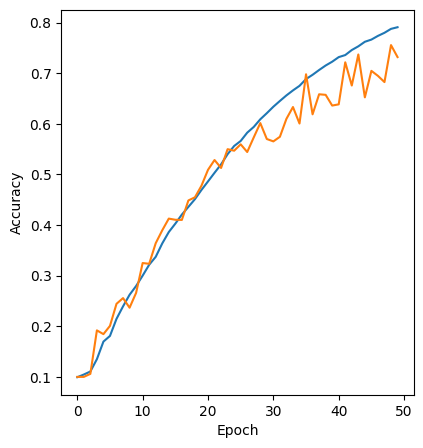

In [7]:
from keras.layers import *


# VGG16 with Data Augmenentation

inputs = keras.Input(shape=(32, 32, 3))
x = RandomFlip("horizontal")(inputs)
x = RandomRotation(0.1)(x)
x = RandomZoom(0.1)(x)

# Block 1
x = keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D((2,2), strides=(2,2))(x)

# Block 2
x = keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D((2,2), strides=(2,2))(x)

# Block 3
x = keras.layers.Conv2D(256, (3,3), activation='relu', padding='same')(x)
x = keras.layers.Conv2D(256, (3,3), activation='relu', padding='same')(x)
x = keras.layers.Conv2D(256, (3,3), activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D((2,2), strides=(2,2))(x)

# Block 4
x = keras.layers.Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = keras.layers.Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = keras.layers.Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D((2,2), strides=(2,2))(x)

# Block 5
x = keras.layers.Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = keras.layers.Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = keras.layers.Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D((2,2), strides=(2,2))(x)

# Fully Connected 
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(4096, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(4096, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and save the history
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Plot the training and validation accuracy and loss
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend

Epoch 1/50
782/782 [==============================] - 19s 22ms/step - loss: 1.9508 - accuracy: 0.2985 - val_loss: 1.6684 - val_accuracy: 0.4203
Epoch 2/50
782/782 [==============================] - 16s 20ms/step - loss: 1.6840 - accuracy: 0.4012 - val_loss: 1.5321 - val_accuracy: 0.4578
Epoch 3/50
782/782 [==============================] - 16s 20ms/step - loss: 1.5978 - accuracy: 0.4353 - val_loss: 1.4643 - val_accuracy: 0.4851
Epoch 4/50
782/782 [==============================] - 15s 19ms/step - loss: 1.5502 - accuracy: 0.4512 - val_loss: 1.4608 - val_accuracy: 0.4832
Epoch 5/50
782/782 [==============================] - 15s 19ms/step - loss: 1.5132 - accuracy: 0.4627 - val_loss: 1.4203 - val_accuracy: 0.4998
Epoch 6/50
782/782 [==============================] - 16s 20ms/step - loss: 1.4835 - accuracy: 0.4731 - val_loss: 1.3874 - val_accuracy: 0.5134
Epoch 7/50
782/782 [==============================] - 16s 20ms/step - loss: 1.4621 - accuracy: 0.4840 - val_loss: 1.3801 - val_accuracy:

<function matplotlib.pyplot.legend(*args, **kwargs)>

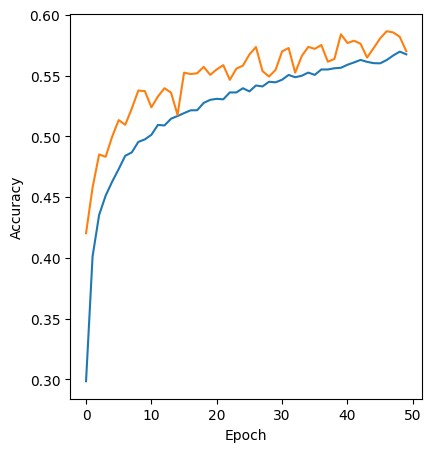

In [11]:
# import keras
# from keras.layers import Input, Dense, Dropout, Flatten
# from keras.models import Model
# from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

# Create a data augmentation layer
data_augmentation = keras.Sequential(
    [
        RandomFlip("horizontal"),
        RandomRotation(0.1),
        RandomZoom(0.1),
    ]
)

# Load the VGG16 model without the fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model's layers.  Whe don't want to train over what was already learned from training on imagenet. 
base_model.trainable = False

# Create a new model with the VGG16 base model, data augmentation layer, and fully connected layers
inputs = keras.Input(shape=(32, 32, 3))
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = Flatten()(x)
x = keras.layers.Dense(4096, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(4096, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(10, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and save the history
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Plot the training and validation accuracy and loss
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend


In [12]:
# Train the model and save the history
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Plot the training and validation accuracy and loss
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend

Epoch 1/50
782/782 [==============================] - 17s 21ms/step - loss: 1.2245 - accuracy: 0.5683 - val_loss: 1.1799 - val_accuracy: 0.5849
Epoch 2/50
782/782 [==============================] - 16s 21ms/step - loss: 1.2192 - accuracy: 0.5687 - val_loss: 1.1715 - val_accuracy: 0.5872
Epoch 3/50
782/782 [==============================] - 16s 20ms/step - loss: 1.2215 - accuracy: 0.5677 - val_loss: 1.1762 - val_accuracy: 0.5845
Epoch 4/50
782/782 [==============================] - 16s 21ms/step - loss: 1.2130 - accuracy: 0.5693 - val_loss: 1.1713 - val_accuracy: 0.5900
Epoch 5/50
782/782 [==============================] - 16s 20ms/step - loss: 1.2095 - accuracy: 0.5694 - val_loss: 1.1647 - val_accuracy: 0.5922
Epoch 6/50
782/782 [==============================] - 16s 21ms/step - loss: 1.2095 - accuracy: 0.5728 - val_loss: 1.3009 - val_accuracy: 0.5546
Epoch 7/50
782/782 [==============================] - 16s 21ms/step - loss: 1.2085 - accuracy: 0.5705 - val_loss: 1.1811 - val_accuracy:

KeyboardInterrupt: ignored